# COMP90086 Workshop 4

In this workshop, you will have some practice of color manipulation and canny edge detection. We will also verify the installed software for the next week's workshop.

Table of Contents

- Color
    - Colour space transformations
    - Colour manipulations
    
- Edge
    - Canny edge detection step by step
    
- Exercise

- Verify softare for the next week
    


# Color

## (1) Colour space transformations

### <center>RGB(red/green/blue) vs. HSV(Hue/Saturation/Value)</center>

<img style="float: ;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/RGB_color_solid_cube.png/1920px-RGB_color_solid_cube.png" width=300 height=300>

(Image Source: Wikipedia)

<img style="float: ;" src="https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/opencv_color_spaces_rgb_additive.png?lossy=1&strip=1&webp=1" width=300 height=300>

(Image Source: These images appears in many places, including [here](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/opencv_color_spaces_rgb_additive.png?lossy=1&strip=1&webp=1))

<img style="float: ;" src="https://upload.wikimedia.org/wikipedia/commons/3/33/HSV_color_solid_cylinder_saturation_gray.png" width=300 height=300>

(Image Source: Wikipedia)


### <center>RGB(device-dependent) vs. XYZ (device-independent)</center>

<center>The CIE XYZ standard observer color matching functions </center>

<img style="float: ;" src="https://upload.wikimedia.org/wikipedia/commons/8/8f/CIE_1931_XYZ_Color_Matching_Functions.svg" width=300 height=300>

(Image Source: Wikipedia)

### <center>Lab</center>

L*: The lightness value, defines black at 0 (down) and white at 100 (up), with neutral grays at the center of the axis. 

The a* axis represents the green–red opponent, with negative values toward green and positive values toward red. 

The b* axis represents the blue–yellow opponents, with negative numbers toward blue and positive toward yellow.

In theory there are no maximum values of a* and b*, but in practice they are usually numbered from -128 to +127 (256 levels).

<img style="float: ;" src="https://www.mdpi.com/diagnostics/diagnostics-13-00467/article_deploy/html/images/diagnostics-13-00467-g003.png" width=300 height=300>

(Image Source: These images appears in many places, including [here](https://www.mdpi.com/diagnostics/diagnostics-13-00467/article_deploy/html/images/diagnostics-13-00467-g003.png))

[Color conversions Explanation](https://docs.opencv.org/4.6.0/de/d25/imgproc_color_conversions.html)

In [43]:
import os
import numpy as np
import cv2  
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (18, 10)

In [ ]:
# RGB subjective - physical hardware, device calibration
# XYZ device independent - Standardised basis, universal representation

[cv2.IMREAD_UNCHANGED](https://docs.opencv.org/4.6.0/d8/d6a/group__imgcodecs__flags.html#gga61d9b0126a3e57d9277ac48327799c80aeddd67043ed0df14f9d9a4e66d2b0708): It is used to read the image as it is. It does not make any changes or ignore anything from the image. You can also specify -1 for this flag.

[cv2.cvtColor( )](https://docs.opencv.org/4.6.0/d8/d01/group__imgproc__color__conversions.html)

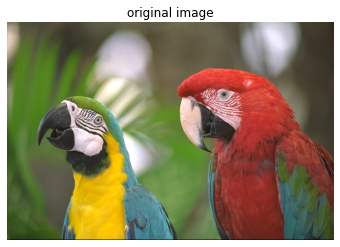

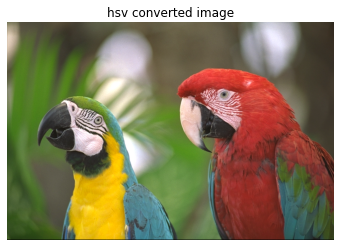

In [3]:
rootpath='./'
img = cv2.imread(os.path.join(rootpath, "kodim23.png"),cv2.IMREAD_UNCHANGED ) #BGR

#rearrange the channel for showing image
img1 = np.zeros(img.shape,np.uint8)
img1[:,:,0] = img[:,:,2] #red
img1[:,:,1] = img[:,:,1] #green
img1[:,:,2] = img[:,:,0] #blue

plt.imshow(img1)
plt.title('original image')
plt.axis('off')
plt.show()


img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_cvt = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

#rearrange the channel for showing image
img2 = np.zeros(img_cvt.shape,np.uint8)
img2[:,:,0] = img_cvt[:,:,2] #red
img2[:,:,1] = img_cvt[:,:,1] #green
img2[:,:,2] = img_cvt[:,:,0] #blue

plt.imshow(img2)
plt.title('hsv converted image')
plt.axis('off')
 
plt.show()


#plt.imshow()
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html 


### Exercise 1

- Transform RGB to XYZ color space and show each channel.
- Transform XYZ back to RGB, and show the final image .

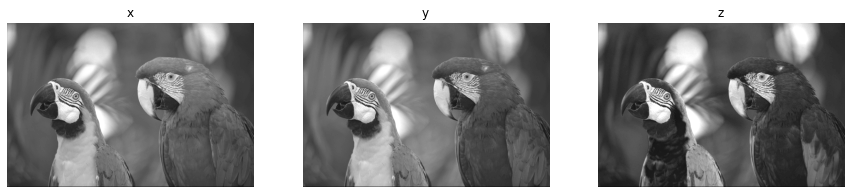

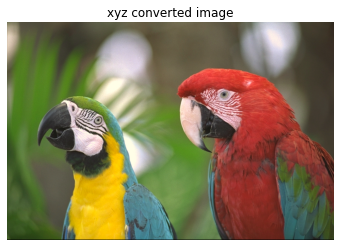

In [3]:
img_xyz = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)

fig,axs = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(15)

plt.subplot(1,3,1)
plt.imshow(img_xyz[:,:,0],cmap='gray') 
plt.title('x')
plt.axis('off')
 
plt.subplot(1,3,2)
plt.imshow(img_xyz[:,:,1],cmap='gray') 
plt.title('y')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_xyz[:,:,2],cmap='gray') 
plt.title('z')
plt.axis('off')

plt.show()


img_cvt = cv2.cvtColor(img_xyz, cv2.COLOR_XYZ2BGR)

#rearrange the channel for showing image
img2 = np.zeros(img_cvt.shape,np.uint8)
img2[:,:,0] = img_cvt[:,:,2] #red
img2[:,:,1] = img_cvt[:,:,1] #green
img2[:,:,2] = img_cvt[:,:,0] #blue

plt.imshow(img2)
plt.title('xyz converted image')
plt.axis('off')
 
plt.show()

In [4]:
img_xyz[:,:,0]

array([[105, 106, 109, ...,  39,  39,  40],
       [109, 109, 110, ...,  40,  40,  39],
       [113, 113, 114, ...,  40,  39,  39],
       ...,
       [ 61,  62,  65, ...,  57,  50,  42],
       [ 61,  61,  62, ...,  55,  47,  45],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

- Transform RGB to LAB colorspace and show each channel.
- Transform LAB back to RGB, and show the final image.

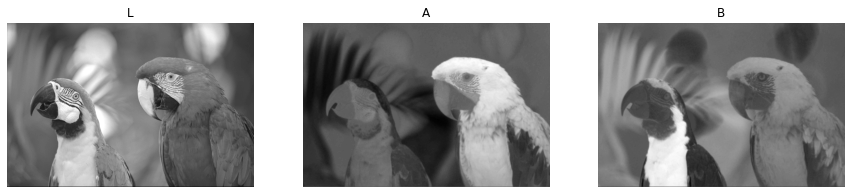

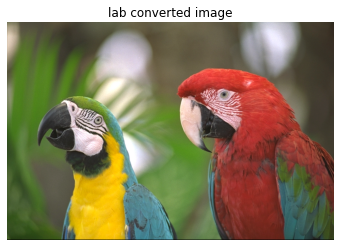

In [6]:
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

fig,axs = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(15)

plt.subplot(1,3,1)
plt.imshow(img_lab[:,:,0],cmap='gray') 
plt.title('L')
plt.axis('off')
 
plt.subplot(1,3,2)
plt.imshow(img_lab[:,:,1],cmap='gray') 
plt.title('A')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_lab[:,:,2],cmap='gray') 
plt.title('B')
plt.axis('off')

plt.show()



img_cvt = cv2.cvtColor(img_lab, cv2.COLOR_Lab2BGR)

#rearrange the channel for showing image
img2 = np.zeros(img_cvt.shape,np.uint8)
img2[:,:,0] = img_cvt[:,:,2] #red
img2[:,:,1] = img_cvt[:,:,1] #green
img2[:,:,2] = img_cvt[:,:,0] #blue

plt.imshow(img2)
plt.title('lab converted image')
plt.axis('off')
 
plt.show()


In [ ]:


# LAB, lightness; a - green-red; b - blue-yellow

In [26]:
import numpy as np
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

# Get the L* channel
L_channel = img_lab[:,:,0]

# Find the minimum and maximum values
min_value = np.amin(L_channel)
max_value = np.amax(L_channel)

print("Minimum value in L* channel:", min_value)
print("Maximum value in L* channel:", max_value)


Minimum value in L* channel: 0
Maximum value in L* channel: 255


## (2) Colour manipulation

Mean value of L channel: 143.50166666666667
Mean value of a* channel: 138.2225
Mean value of b* channel: 163.89333333333335


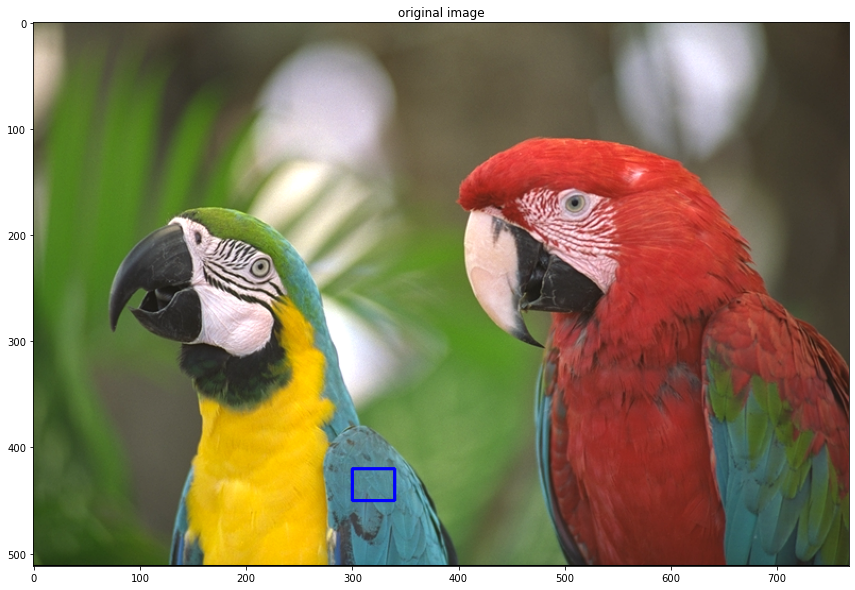

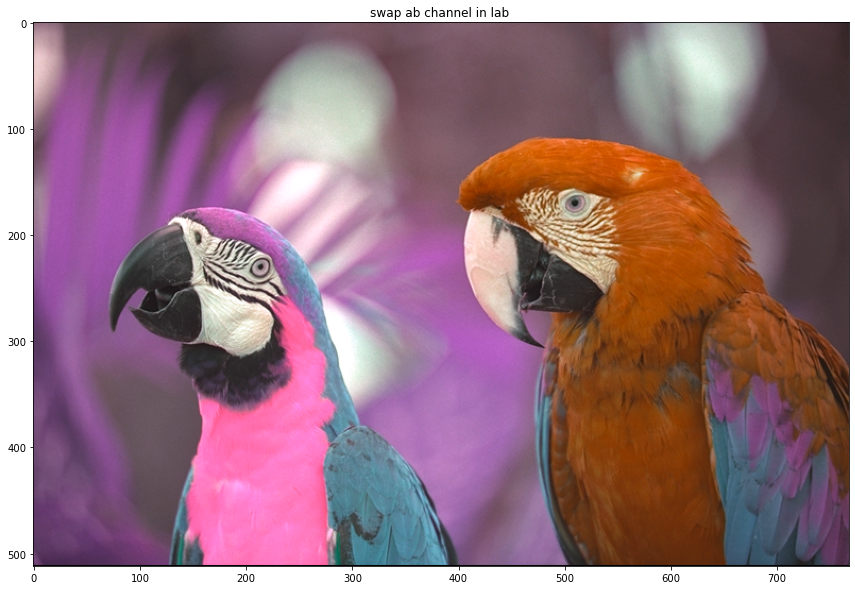

In [87]:
rootpath = './'
img = cv2.imread(os.path.join(rootpath, "kodim23.png"),cv2.IMREAD_UNCHANGED ) #BGR

#rearrange the channel for showing image
img1 = np.zeros(img.shape,np.uint8)

# ******************* NB uint 8 (unsigned 8 bits). 2^8 = 256 values, 0-255. 
# *******************


img1[:,:,0] = img[:,:,2] #red
img1[:,:,1] = img[:,:,1] #green
img1[:,:,2] = img[:,:,0] #blue

img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

#swap a b channel for showing difference
img_lab2 = np.zeros(img_lab.shape,np.uint8)
img_lab2[:,:,0] = img_lab[:,:,0] 
img_lab2[:,:,1] = img_lab[:,:,2] 
img_lab2[:,:,2] = img_lab[:,:,1]



rect_top_left = (300, 420)
rect_bottom_right = (340, 450)

# rect_top_left = (200, 400)
# rect_bottom_right = (250, 450)

cv2.rectangle(img1, rect_top_left, rect_bottom_right, (0, 0, 255), 2)  # Rectangle with red color
cropped_region = img1[rect_top_left[1]:rect_bottom_right[1], rect_top_left[0]:rect_bottom_right[0]]

# Convert the cropped region to Lab color space
cropped_lab = cv2.cvtColor(cropped_region, cv2.COLOR_BGR2Lab)

# Step 4: Compute the mean values for the a* and b* channels
mean_a = np.mean(cropped_lab[:,:,1])
mean_b = np.mean(cropped_lab[:,:,2])
mean_L = np.mean(cropped_lab[:,:,0])


# Step 5: Print out the mean values
print(f"Mean value of L channel: {mean_L}")
print(f"Mean value of a* channel: {mean_a}")
print(f"Mean value of b* channel: {mean_b}")







img_cvt = cv2.cvtColor(img_lab2, cv2.COLOR_Lab2BGR)

#rearrange the channel for showing image
img2 = np.zeros(img_cvt.shape,np.uint8)
img2[:,:,0] = img_cvt[:,:,2] #red
img2[:,:,1] = img_cvt[:,:,1] #green
img2[:,:,2] = img_cvt[:,:,0] #blue

plt.imshow(img1)
plt.title('original image')
# plt.axis('off')
plt.show()

plt.imshow(img2)
plt.title('swap ab channel in lab ')
# plt.axis('off')
 
plt.show()


In [89]:
np.min(cropped_lab[:,:,0])

107

In [5]:
img.shape

(512, 768, 3)

Note, 

White unchanged, red to yellow, cyan unchanged, 

### Exercise 2
- Transform to LAB, invert the `a` axis, then back transform to RGB. Show the result.

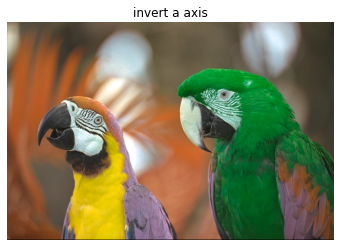

In [18]:
img = cv2.imread(os.path.join(rootpath, "kodim23.png"),cv2.IMREAD_UNCHANGED ) #BGR

img_lab3 = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

#invert a axis
img_lab3[:,:,1]=-img_lab3[:,:,1]

img_cvt2 = cv2.cvtColor(img_lab3, cv2.COLOR_Lab2BGR)

#rearrange the channel for showing image
img4 = np.zeros(img_cvt2.shape,np.uint8)
img4[:,:,0] = img_cvt2[:,:,2] #red
img4[:,:,1] = img_cvt2[:,:,1] #green
img4[:,:,2] = img_cvt2[:,:,0] #blue

plt.imshow(img4)
plt.title('invert a axis')
plt.axis('off')
 
plt.show()

# Edge

##  (1) Canny edge detection step by step

### Load the image using OpenCV with grayscale.

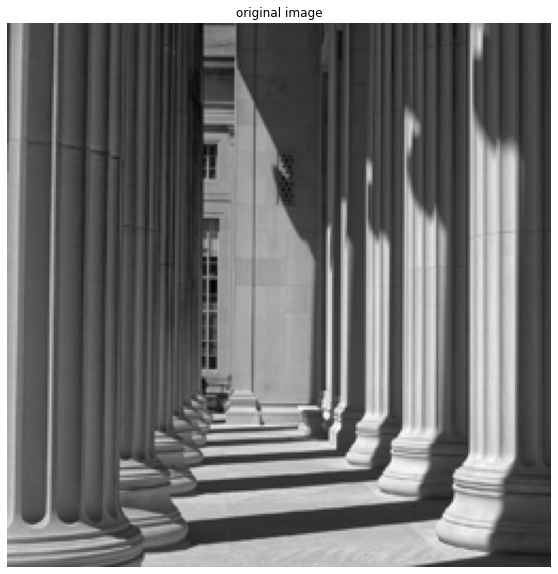

In [69]:
rootpath='./'
org_img = cv2.imread(os.path.join(rootpath, "cannyimg.png"),cv2.IMREAD_GRAYSCALE )
org_img = org_img.astype(float)

 
plt.imshow(org_img ,cmap='gray')  
plt.title('original image')
plt.axis('off')

plt.show()
  

### Find edge magnitude and orientation (Gradient Calculation)
- Edges are points in the image with a high change in intensity = high change in gradient.
- Accurate edge detection requires smoothing image noise.
- Edge detector = derivative of Gaussian filter, combines smoothing and gradient response.

<img style="float: ;" src="https://upload.wikimedia.org/wikipedia/commons/c/c1/Wiki_slope_in_2d.svg" width=250 height=150>

(Image Source: Wikipedia)

<img style="float: ;" src="https://pic2.zhimg.com/v2-aad2460de5edbb636b1028e47957c5e1_b.webp" width=250 height=150>

(Image Source: These images appears in many places, including [here](https://pic2.zhimg.com/v2-aad2460de5edbb636b1028e47957c5e1_b.webp))

<img style="float: ;" src="https://wikimedia.org/api/rest_v1/media/math/render/svg/23ae6772c5f58751fc6014b71d6adafb30a31c79" width=200 height=100>

<img style="float: ;" src="https://raw.githubusercontent.com/saraao/COMP90086_image/main/math.png" width=200 height=100>

Note, swapping signs on sobel x detector, flips output values (positive become negative etc.). Therefore, when we graph the output black becomes white and vice versa. 

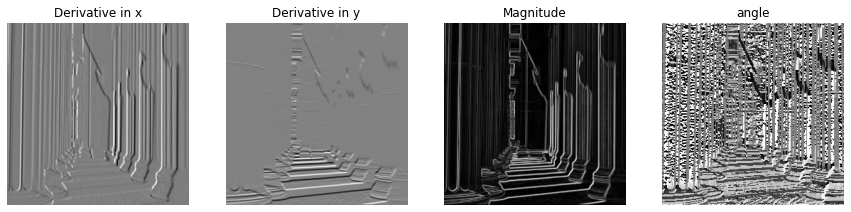

In [70]:
# X-Direction Kernel (Vertical)
# sobel_kernel_x = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])

# **************************************************************************
sobel_kernel_x = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
# Y-Direction Kernel (Horizontal)
sobel_kernel_y = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])

# Use Sobel filter to approximate the derivative of gaussian (for both x and y)
dx = cv2.filter2D(org_img,-1,sobel_kernel_x)
dy = cv2.filter2D(org_img,-1,sobel_kernel_y)

magnitude = np.hypot(dx, dy)   # equivalent to sqrt(x1**2 + x2**2), element-wise
 
angle = np.arctan2(dy, dx)     # Element-wise arc tangent of dy/dx 

fig,axs = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(15)

plt.subplot(1,4,1)
plt.imshow(dx,cmap='gray') 
plt.title('Derivative in x')
plt.axis('off')
 
plt.subplot(1,4,2)
plt.imshow(dy,cmap='gray') 
plt.title('Derivative in y')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(magnitude,cmap=  'gray') 
plt.title('Magnitude')
plt.axis('off')

deg_angle = np.rad2deg(angle) + 180  
plt.subplot(1,4,4)
plt.imshow(deg_angle,cmap=  'gray') 
plt.title('angle')
plt.axis('off')

plt.show()


sobel_kernel_x1
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

sobel_kernel_x2
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]



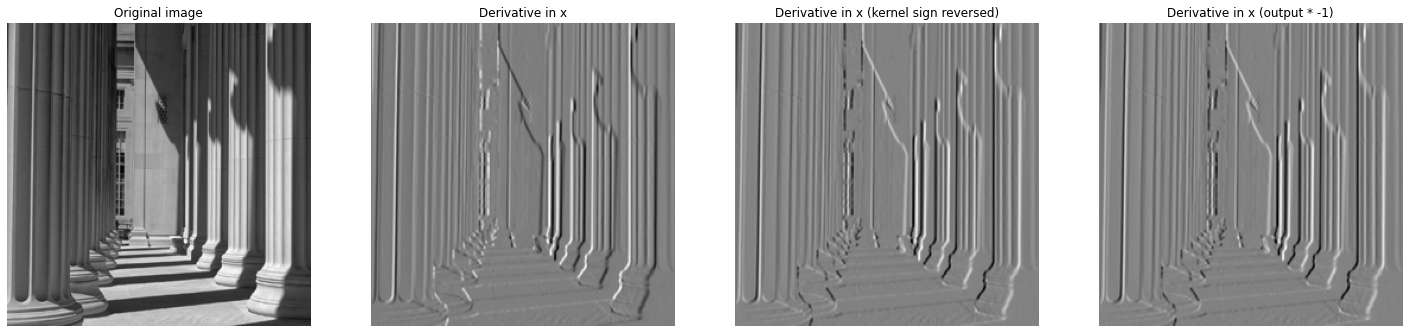

In [84]:
# Reverse sign on sobel_kernel edge detection
sobel_kernel_x1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobel_kernel_x2 = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])

# Use Sobel filter to approximate the derivative of gaussian (for both x and y)
dx1 = cv2.filter2D(org_img,-1,sobel_kernel_x1)
dx2 = cv2.filter2D(org_img,-1,sobel_kernel_x2)

fig,axs = plt.subplots(1,2)
fig.set_figwidth(25)
fig.set_figheight(15)

print("sobel_kernel_x1")
print(sobel_kernel_x1)
print()
print("sobel_kernel_x2")
print(sobel_kernel_x2)
print()

plt.subplot(1,4,1)
plt.imshow(org_img,cmap='gray') 
plt.title('Original image')
plt.axis('off')


plt.subplot(1,4,2)
plt.imshow(dx1,cmap='gray') 
plt.title('Derivative in x')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(dx2,cmap='gray') 
plt.title('Derivative in x (kernel sign reversed)')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(dx1*-1,cmap='gray') 
plt.title('Derivative in x (output * -1)')
plt.axis('off')

plt.show()

In [80]:
print(min(dx1.ravel()))
print(max(dx1.ravel()))
print()
print(min(dx2.ravel()))
print(max(dx2.ravel()))

-637.0
652.0

-652.0
637.0


In [52]:
print(min(deg_angle.ravel()))
print(max(deg_angle.ravel()))

0.09597274024622493
360.0


In [53]:
print(min(angle.ravel()))
print(max(angle.ravel()))

-3.139917613280335
3.141592653589793


In [54]:
print(magnitude.shape)
print(min(magnitude.ravel()))
print(max(magnitude.ravel()))

(256, 256)
0.0
728.8689868556626


### Exercise 3: Non-maximum Suppression of Edges (fill the code for diagonal directions)
- Bin edges by orientation
- For each edge pixel:
    - Check the two neighbour pixels orthogonal to this edge pixel
    - If either neighbour has same edge orientation AND higher magnitude, this pixel is not an edge
    
<img style="float: ;" src="https://raw.githubusercontent.com/saraao/COMP90086_image/main/zone.jpg" width=350 height=350>

(Image Source: Jiayang)

<img style="float: ;" src="https://i0.wp.com/theailearner.com/wp-content/uploads/2019/05/Grad_direc-2.png?w=713&ssl=1" width=350 height=350>

(Image Source: These images appears in many places, including [here](https://i0.wp.com/theailearner.com/wp-content/uploads/2019/05/Grad_direc-2.png?w=713&ssl=1))

<img style="float: ;" src="https://docs.opencv.org/3.4/nms.jpg" width=500 height=500>
(Image Source: OpenCV)

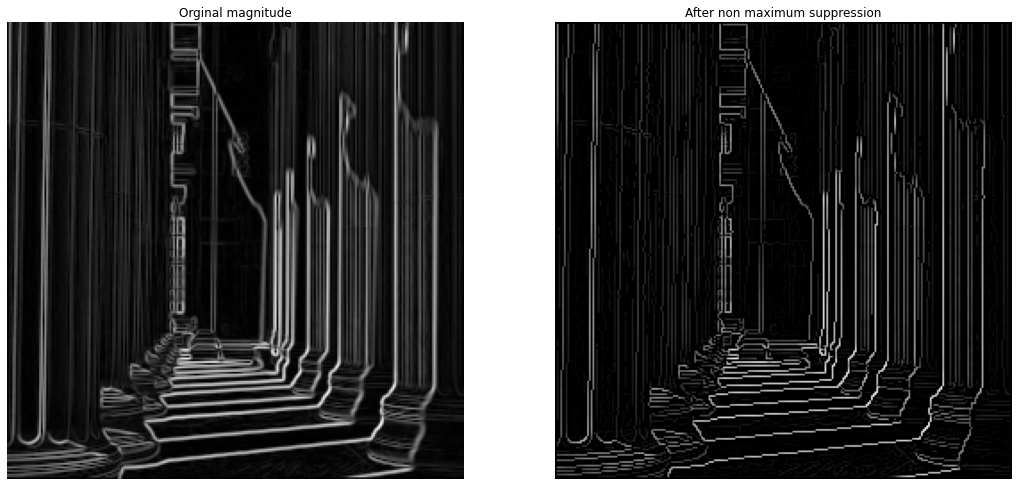

In [55]:
def non_maximum_suppression(magnitude,angle):
    
    size = magnitude.shape
    result = np.zeros_like(magnitude) #Return an array of zeros with the same shape and type as a given array.

    angle = np.rad2deg(angle) + 180    # Convert angle from radians to degrees.

    
    for i in range(1, size[0]-1):         # row,    vertical
        for j in range(1, size[1]-1):     # column, horizontal
            
            # round the angle to one of four angles representing: 
            # 1 * horizontal, 2 * diagonal (45 degrees and 135 degrees), 1 * vertical directions.
            
            # horizontal
            if 157.5 <= angle[i,j] < 202.5 or 0 <= angle[i,j] < 22.5 or 337.5 <= angle[i,j] <= 360:
                p1 = magnitude[i,j-1]  # left
                p2 = magnitude[i,j+1]  # right
                
            # vertical
            elif 67.5 <= angle[i,j] < 112.5 or 247.5 <= angle[i,j] < 292.5:
                p1 = magnitude[i+1,j]  # upper
                p2 = magnitude[i-1,j]  # lower
            
            # 45 degrees
            elif 22.5 <= angle[i,j] < 67.5 or 202.5 <= angle[i,j] < 247.5:
                p1 = magnitude[i-1,j-1]  # lower-left
                p2 = magnitude[i+1,j+1]  # upper-right
                
            # 135 degrees
            elif 112.5 <= angle[i,j] < 157.5 or 292.5 <= angle[i,j] < 337.5:
                p1 = magnitude[i+1,j-1]  # upper-left
                p2 = magnitude[i-1,j+1]  # lower-right
            
            # Update the result only if one neighbour has same edge orientation (done above) AND higher magnitude
            if magnitude[i,j] >= p1 and magnitude[i,j] >= p2:
                result[i,j] = magnitude[i,j]
                
    return result 

magnitude_nms = non_maximum_suppression(magnitude,angle)
# magnitude_nms = np.uint32(magnitude_nms)    # The gradient values might be very large - they should not overflow

fig,axs = plt.subplots(1,2)
fig.set_figwidth(18)
fig.set_figheight(18)

# plt will normalize the magnitude to [0, 255]
plt.subplot(1,2,1)
plt.imshow(magnitude, cmap='gray') 
plt.title('Orginal magnitude')
plt.axis('off')
 
plt.subplot(1,2,2)
plt.imshow(magnitude_nms, cmap='gray') 
plt.title('After non maximum suppression')
plt.axis('off')

plt.show()

### Hysteresis Thresholding

- Two thresholds T<sub>1</sub>, T<sub>2</sub>, with T<sub>1</sub> > T<sub>2</sub>
- Strong edges: magnitude > T<sub>1</sub>
- Weak edges: T<sub>1</sub> > magnitude > T<sub>2</sub>
- For each weak edge:
    - Check the 8-pixel neighbourhood around this pixel
    - If any neighbour is a strong edge, relabel the weak edge pixel as a strong edge
- Final edge map = strong edges

<img style="float: ;" src="https://docs.opencv.org/3.4/hysteresis.jpg" width=500 height=500>

(Image Source: OpenCV)

In [10]:
import timeit   # Measure execution time

Time:  0.2762863150001067


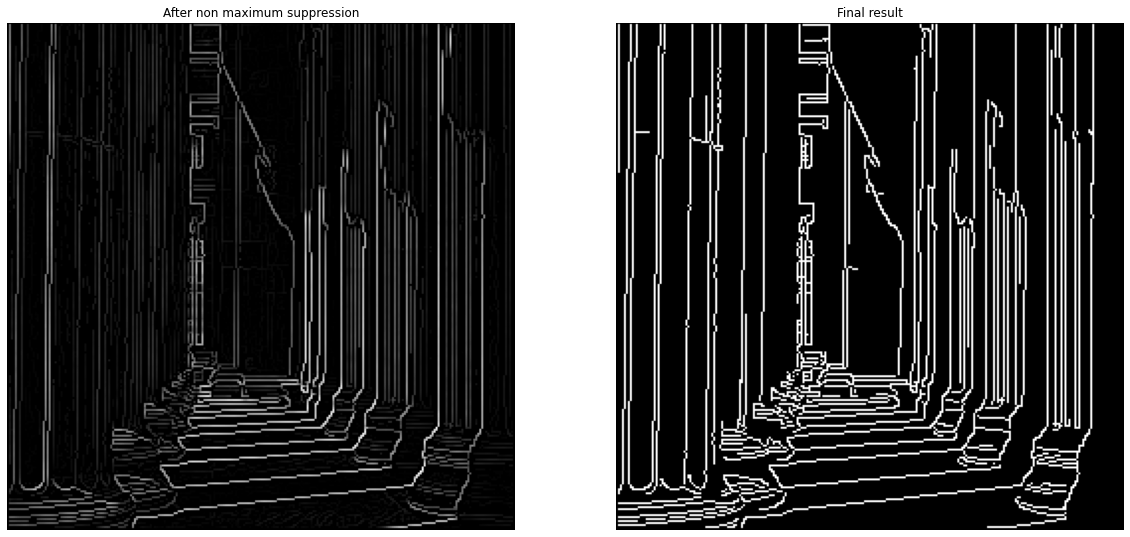

In [56]:
def hysteresis_threshold(magnitude, low_threshold=50, high_threshold=200):
    
    size = magnitude.shape
    result = np.zeros_like(magnitude)
 
    strong_edge_value = np.int32(255)     # int32 will resolve overflow issue of gredients
    
    strong_edges_x, strong_edges_y = np.where(magnitude >= high_threshold)
    non_edges_x, non_edges_y = np.where(magnitude <= low_threshold)
    
    result[strong_edges_x, strong_edges_y] = strong_edge_value
    
    weak_edge_x, weak_edge_y = np.where((magnitude < high_threshold) & (magnitude > low_threshold))
    
    # We need to repeat this for several times, as some weak edges are relabeled as strong egdes during each iteration
    for _ in range(2):    
        for i in range(len(weak_edge_x)):
            x,y = weak_edge_x[i], weak_edge_y[i]
            # check 8-pixel neighbourhood around this pixel
            if result[x+1,y] == strong_edge_value or result[x+1,y+1] == strong_edge_value or \
            result[x+1,y-1] == strong_edge_value or result[x-1,y] == strong_edge_value or result[x-1,y+1] == strong_edge_value or \
            result[x-1,y-1] == strong_edge_value or result[x,y+1] == strong_edge_value or result[x,y-1] == strong_edge_value:
                 result[x, y] = strong_edge_value

        for i in reversed(range(len(weak_edge_x))):
            x,y = weak_edge_x[i], weak_edge_y[i]
            # check 8-pixel neighbourhood around this pixel
            if result[x+1,y] == strong_edge_value or result[x+1,y+1] == strong_edge_value or \
            result[x+1,y-1] == strong_edge_value or result[x-1,y] == strong_edge_value or result[x-1,y+1] == strong_edge_value or \
            result[x-1,y-1] == strong_edge_value or result[x,y+1] == strong_edge_value or result[x,y-1] == strong_edge_value:
                 result[x, y] = strong_edge_value

    return result

start = timeit.default_timer()

final_res1 = hysteresis_threshold(magnitude_nms, 50, 196)

stop = timeit.default_timer()
print('Time: ', stop - start)

fig,axs = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(20)

plt.subplot(1,2,1)
plt.imshow(magnitude_nms,cmap='gray') 
plt.title('After non maximum suppression')
plt.axis('off')
 
plt.subplot(1,2,2)
plt.imshow(final_res1,cmap='gray') 
plt.title('Final result')
plt.axis('off')

plt.show()

Time:  12.860834532000808


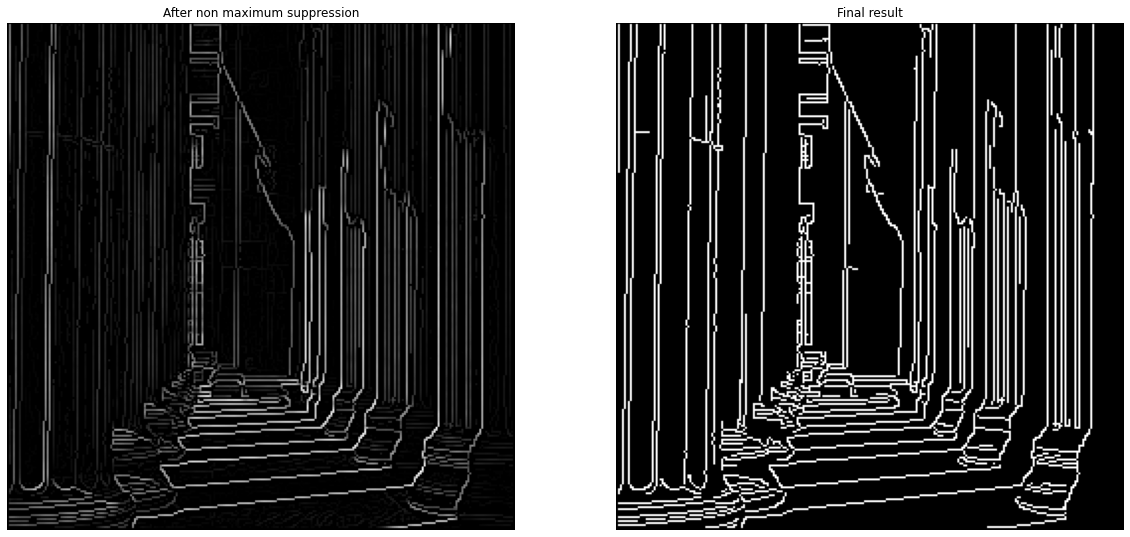

In [57]:
import itertools 
# Functions creating iterators for efficient looping
OFFSETS = list(itertools.product([-1, 0, 1], [-1, 0, 1]))
OFFSETS.remove((0, 0))
# OFFSETS = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

def hysteresis_threshold(magnitude, low_threshold=50, high_threshold=200):
    
    size = magnitude.shape
    result = np.zeros_like(magnitude)
    
    strong_edge_value = np.int32(255)
    weak_edge_value = np.int32(low_threshold)
    
    strong_edges_x, strong_edges_y = np.where(magnitude >= high_threshold)
    non_edges_x, non_edges_y = np.where(magnitude <= low_threshold)
    
    result[strong_edges_x, strong_edges_y] = strong_edge_value  # make all existing strong edges as 255
    
    weak_edge_x, weak_edge_y = np.where((magnitude < high_threshold) & (magnitude > low_threshold))
    result[weak_edge_x, weak_edge_y] = weak_edge_value          # make all existing strong edges as the low threshold (T_2)
    
    strong_num = len(strong_edges_x)
    prev_strong_num = 0
   
    while(strong_num != prev_strong_num): # find all weak edges until the number does not change
        prev_strong_num = strong_num
        weak_edge_x, weak_edge_y = np.where(result == weak_edge_value)

        for i in range(len(weak_edge_x)):
            x,y = weak_edge_x[i], weak_edge_y[i]
            # check 8-pixel neighbourhood around this pixel
            has_strong_edge = False
            for offset_x, offset_y in OFFSETS:
                if result[x+offset_x, y+offset_y] == strong_edge_value:
                    has_strong_edge = True         
            if has_strong_edge:
                result[x, y] = strong_edge_value
                strong_num += 1
    
    weak_edge_x, weak_edge_y = np.where(result == weak_edge_value)
    result[weak_edge_x, weak_edge_y] = 0
 
    return result

start = timeit.default_timer()

final_res2 = hysteresis_threshold(magnitude_nms, 50, 196) 

stop = timeit.default_timer()
print('Time: ', stop - start)

fig,axs = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(20)

plt.subplot(1,2,1)
plt.imshow(magnitude_nms,cmap='gray') 
plt.title('After non maximum suppression')
plt.axis('off')
 
plt.subplot(1,2,2)
plt.imshow(final_res2,cmap='gray') 
plt.title('Final result')
plt.axis('off')

plt.show()

In [86]:
list(itertools.product([1, 2], [4,5]))

[(1, 4), (1, 5), (2, 4), (2, 5)]

In [85]:
OFFSETS

[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

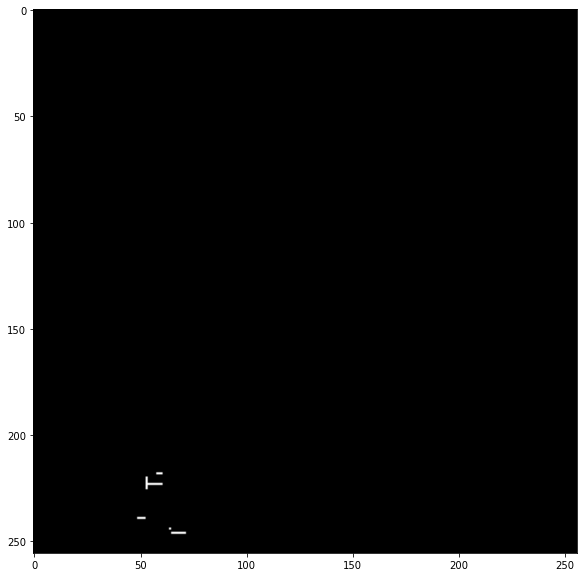

In [61]:
diff = np.abs(final_res2 - final_res1)
plt.imshow(diff,cmap='gray') 

The process of Canny Edge Detection algorithm can be broken down to multi-stage:

- 1.Apply Gaussian filter to smooth the image in order to remove the noise

- 2.Find edge magnitute and direction (Gradient Calculation)

- 3.Apply Non-Maximum Suppression to thin the edges

- 4.Apply Hysteresis Thresholding to find "really edges" and further reduce the noise.

### Exercise 4: Canny edge detection with OpenCV
- Conduct experiments with the built-in Canny function in opencv to see the effect of changing the thresholds and the scale (=apertureSize)

See: https://docs.opencv.org/4.6.0/da/d22/tutorial_py_canny.html

[cv.Canny](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) (image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]	) 

Parameters

- image:	8-bit input image.

- edges:	output edge map; single channels 8-bit image, which has the same size as image.

- threshold1:	first threshold for the hysteresis procedure.

- threshold2:	second threshold for the hysteresis procedure.

- apertureSize:	aperture size for the Sobel operator. By default it is 3.

- L2gradient: a flag, indicating whether a more accurate should be used to calculate the image gradient magnitude

L2gradient (By default, it is False):

- If True, it uses the equation mentioned above which is more accurate

- If False, it uses this function: Edge_Gradient(G)=|Gx|+|Gy|

Time:  0.0005320889995346079


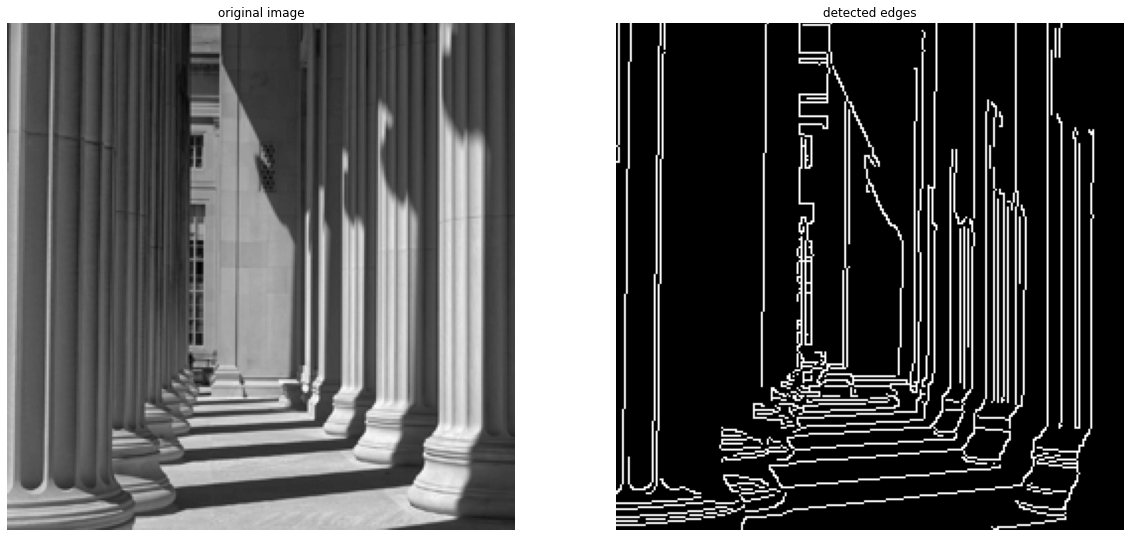

In [67]:
import timeit
rootpath='./'
org_img = cv2.imread(os.path.join(rootpath, "cannyimg.png"),cv2.IMREAD_GRAYSCALE )

start = timeit.default_timer()

edge_img = cv2.Canny(org_img,100,200,3,L2gradient=True) #two thresholds in Hysteresis Thresholding and Aperture size of the Sobel

stop = timeit.default_timer()
print('Time: ', stop - start)

fig,axs = plt.subplots(1,2)
fig.set_figwidth(20)
fig.set_figheight(20)

plt.subplot(1,2,1)
plt.imshow(org_img ,cmap='gray')  
plt.title('original image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edge_img ,cmap='gray')  
plt.title('detected edges')
plt.axis('off')

plt.show()

### Exercise 5

Assume that all surfaces in the image below are Lambertian (diffuse reflectance) surfaces, and the scene is lit by a single light source. 

i) What are the scene/object parameters that determine the R,G,B value of each pixel in this scene? 

ii) At the region indicated by the circle and arrow, which of the parameters you listed in (i) are changing and which are constant?

### Image 1
<img style="float: ;" src="https://raw.githubusercontent.com/saraao/COMP90086_image/main/img1.png" width=400 height=400>

### Image 2
<img style="float: ;" src="https://raw.githubusercontent.com/saraao/COMP90086_image/main/img2.png" width=400 height=400>

### Image 3
<img style="float: ;" src="https://raw.githubusercontent.com/saraao/COMP90086_image/main/img3.png" width=400 height=400>

# Verify softare for the next week

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
 

print("TensorFlow version: ", tf.__version__)


TensorFlow version:  2.7.0
